# An introduction to SAMBA: Bivariate Bayesian Model Mixing

Alexandra Semposki

Date: 06 June 2022

## Introduction

From the last notebook, you saw the linear mixture model in action. Now we are going to look at the second method in the paper: __Bivariate Bayesian Model Mixing__. This is the easiest method to implement in code. We are simply going to take our two series expansions, $F_{s}^{N_{s}}(g)$ and $F_{l}^{N_{l}}(g)$, and mix them according to
$$
f^{\dagger} \sim \bigl(Z_P^{-1}\sum_k \frac{1}{v_k}f_k, Z_P^{-1}\bigr),
$$

where 

$$
Z_P \equiv \sum_{k=1}^{K}\frac{1}{v_k}.
$$

$Z_P$ is the precision, or the inverse of the variance, of the $K$ models, $v_{k}$ the individual variances of each model (which we previously denoted the theory error), and $f^{\dagger}$ the mixed model.

We start by loading all of our necessary packages and classes.

In [2]:
%load_ext autoreload
%autoreload 2

#import packages
import numpy as np
import math
import statistics
from scipy import stats, special, integrate

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

#matplotlib settings for Latex plots
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next we load the pertinent classes from SAMBA.

In [4]:
#load SAMBA classes
import sys
sys.path.append('../../')

from samba.models import Models, Uncertainties
from samba.discrepancy import Bivariate

Let's choose $N_{s} = N_{l} = 2$ again for the first calculation, to compare to the results of the LMM method if desired.

In [11]:
#set up linspace and expansions
g = np.linspace(1e-6,1.0,200)
ns = 2
nl = 2

Now we can instantiate an object for the Bivariate method.

In [12]:
#instantiate first object for N_s = N_l = 2
model1 = Bivariate(ns, nl, error_model='informative')

Let's plot our functions again before we mix them.

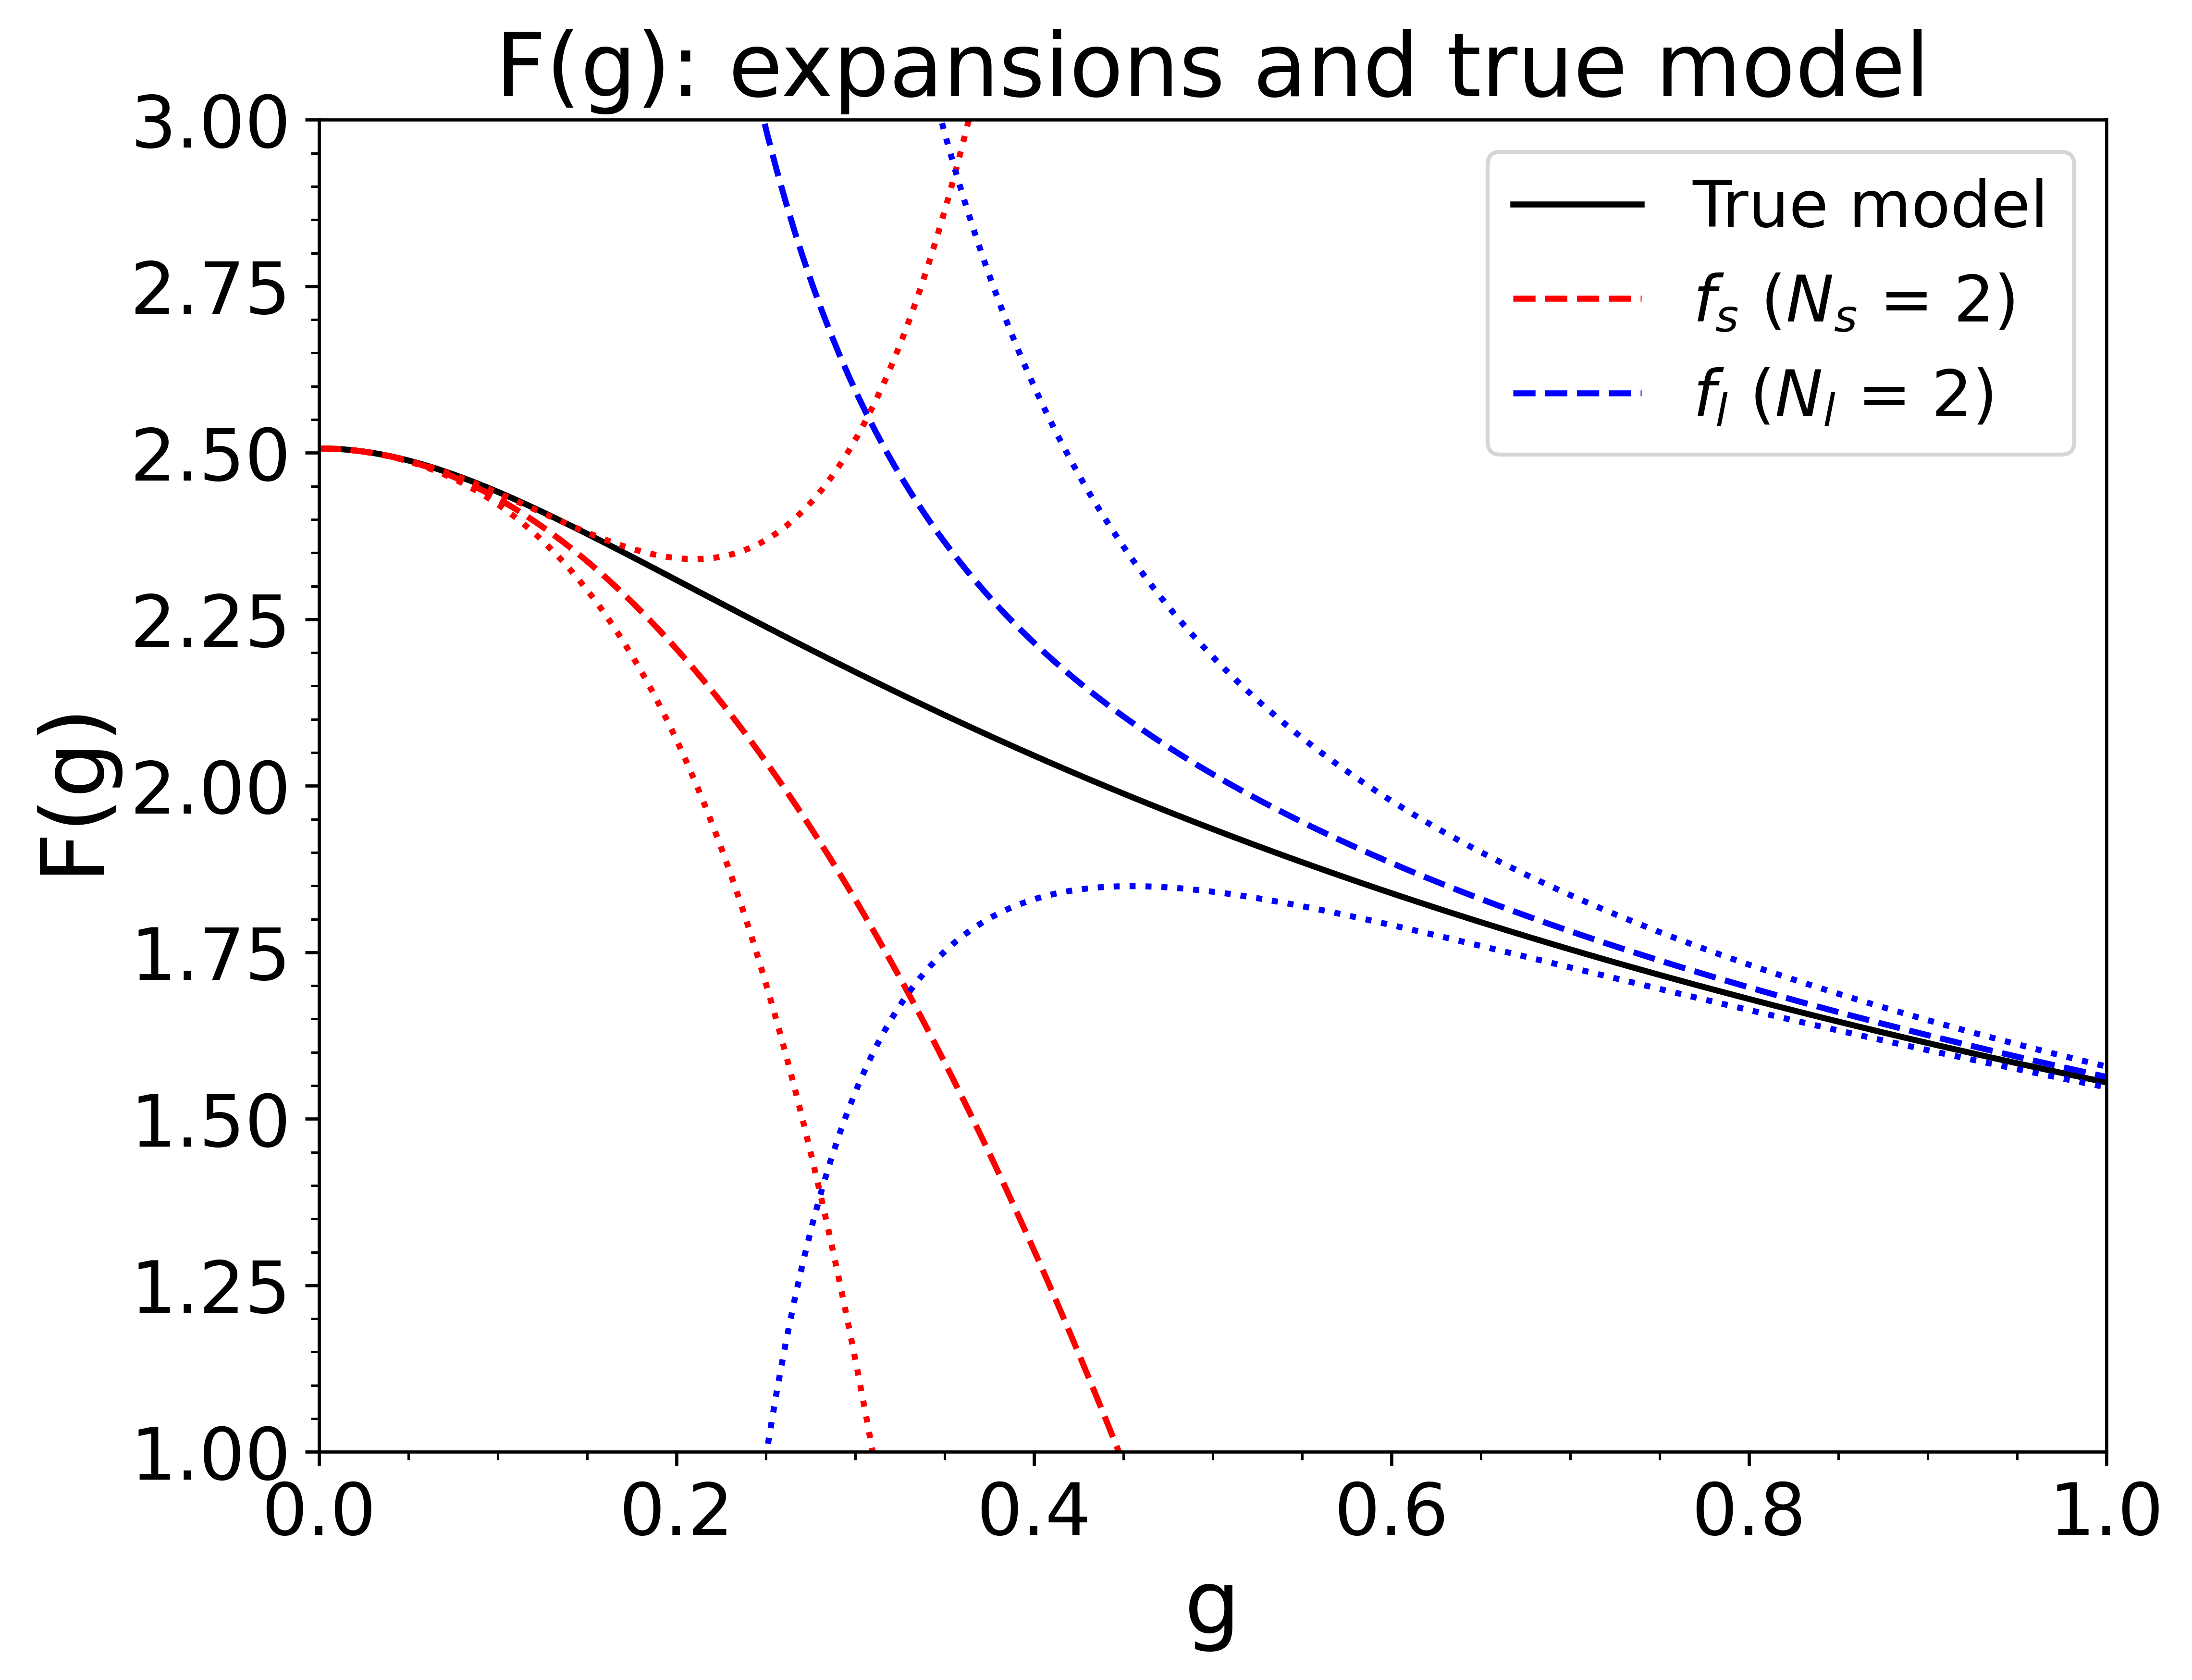

In [13]:
#call plot_models() from Models() class
plot_model = model1.plot_models(g)

## Bivariate model mixing: PPD

Now we want to mix the two expansions. All we will need is to call the __plot_mix()__ function from the Bivariate() class, as it already calculates the necessary variances internally via the Uncertainties() class, and uses the fdagger() function internally as well. 

---

*Expected values for mean1 and intervals1 below for $N_{s}=N_{l}=2$:* 

mean1 = [2.50662827 2.50643831 2.50586856 2.50491903 2.50358972 ... 1.57507465 1.57205367 1.56905117 1.56606692 1.56310071]

intervals1 = [[2.50662827 2.50662827]
 [2.50643825 2.50643836]
 [2.50586769 2.50586943]...
 [1.55288561 1.58521673]
 [1.55018531 1.58194852]
 [1.54749668 1.57870474]]
 
 ---

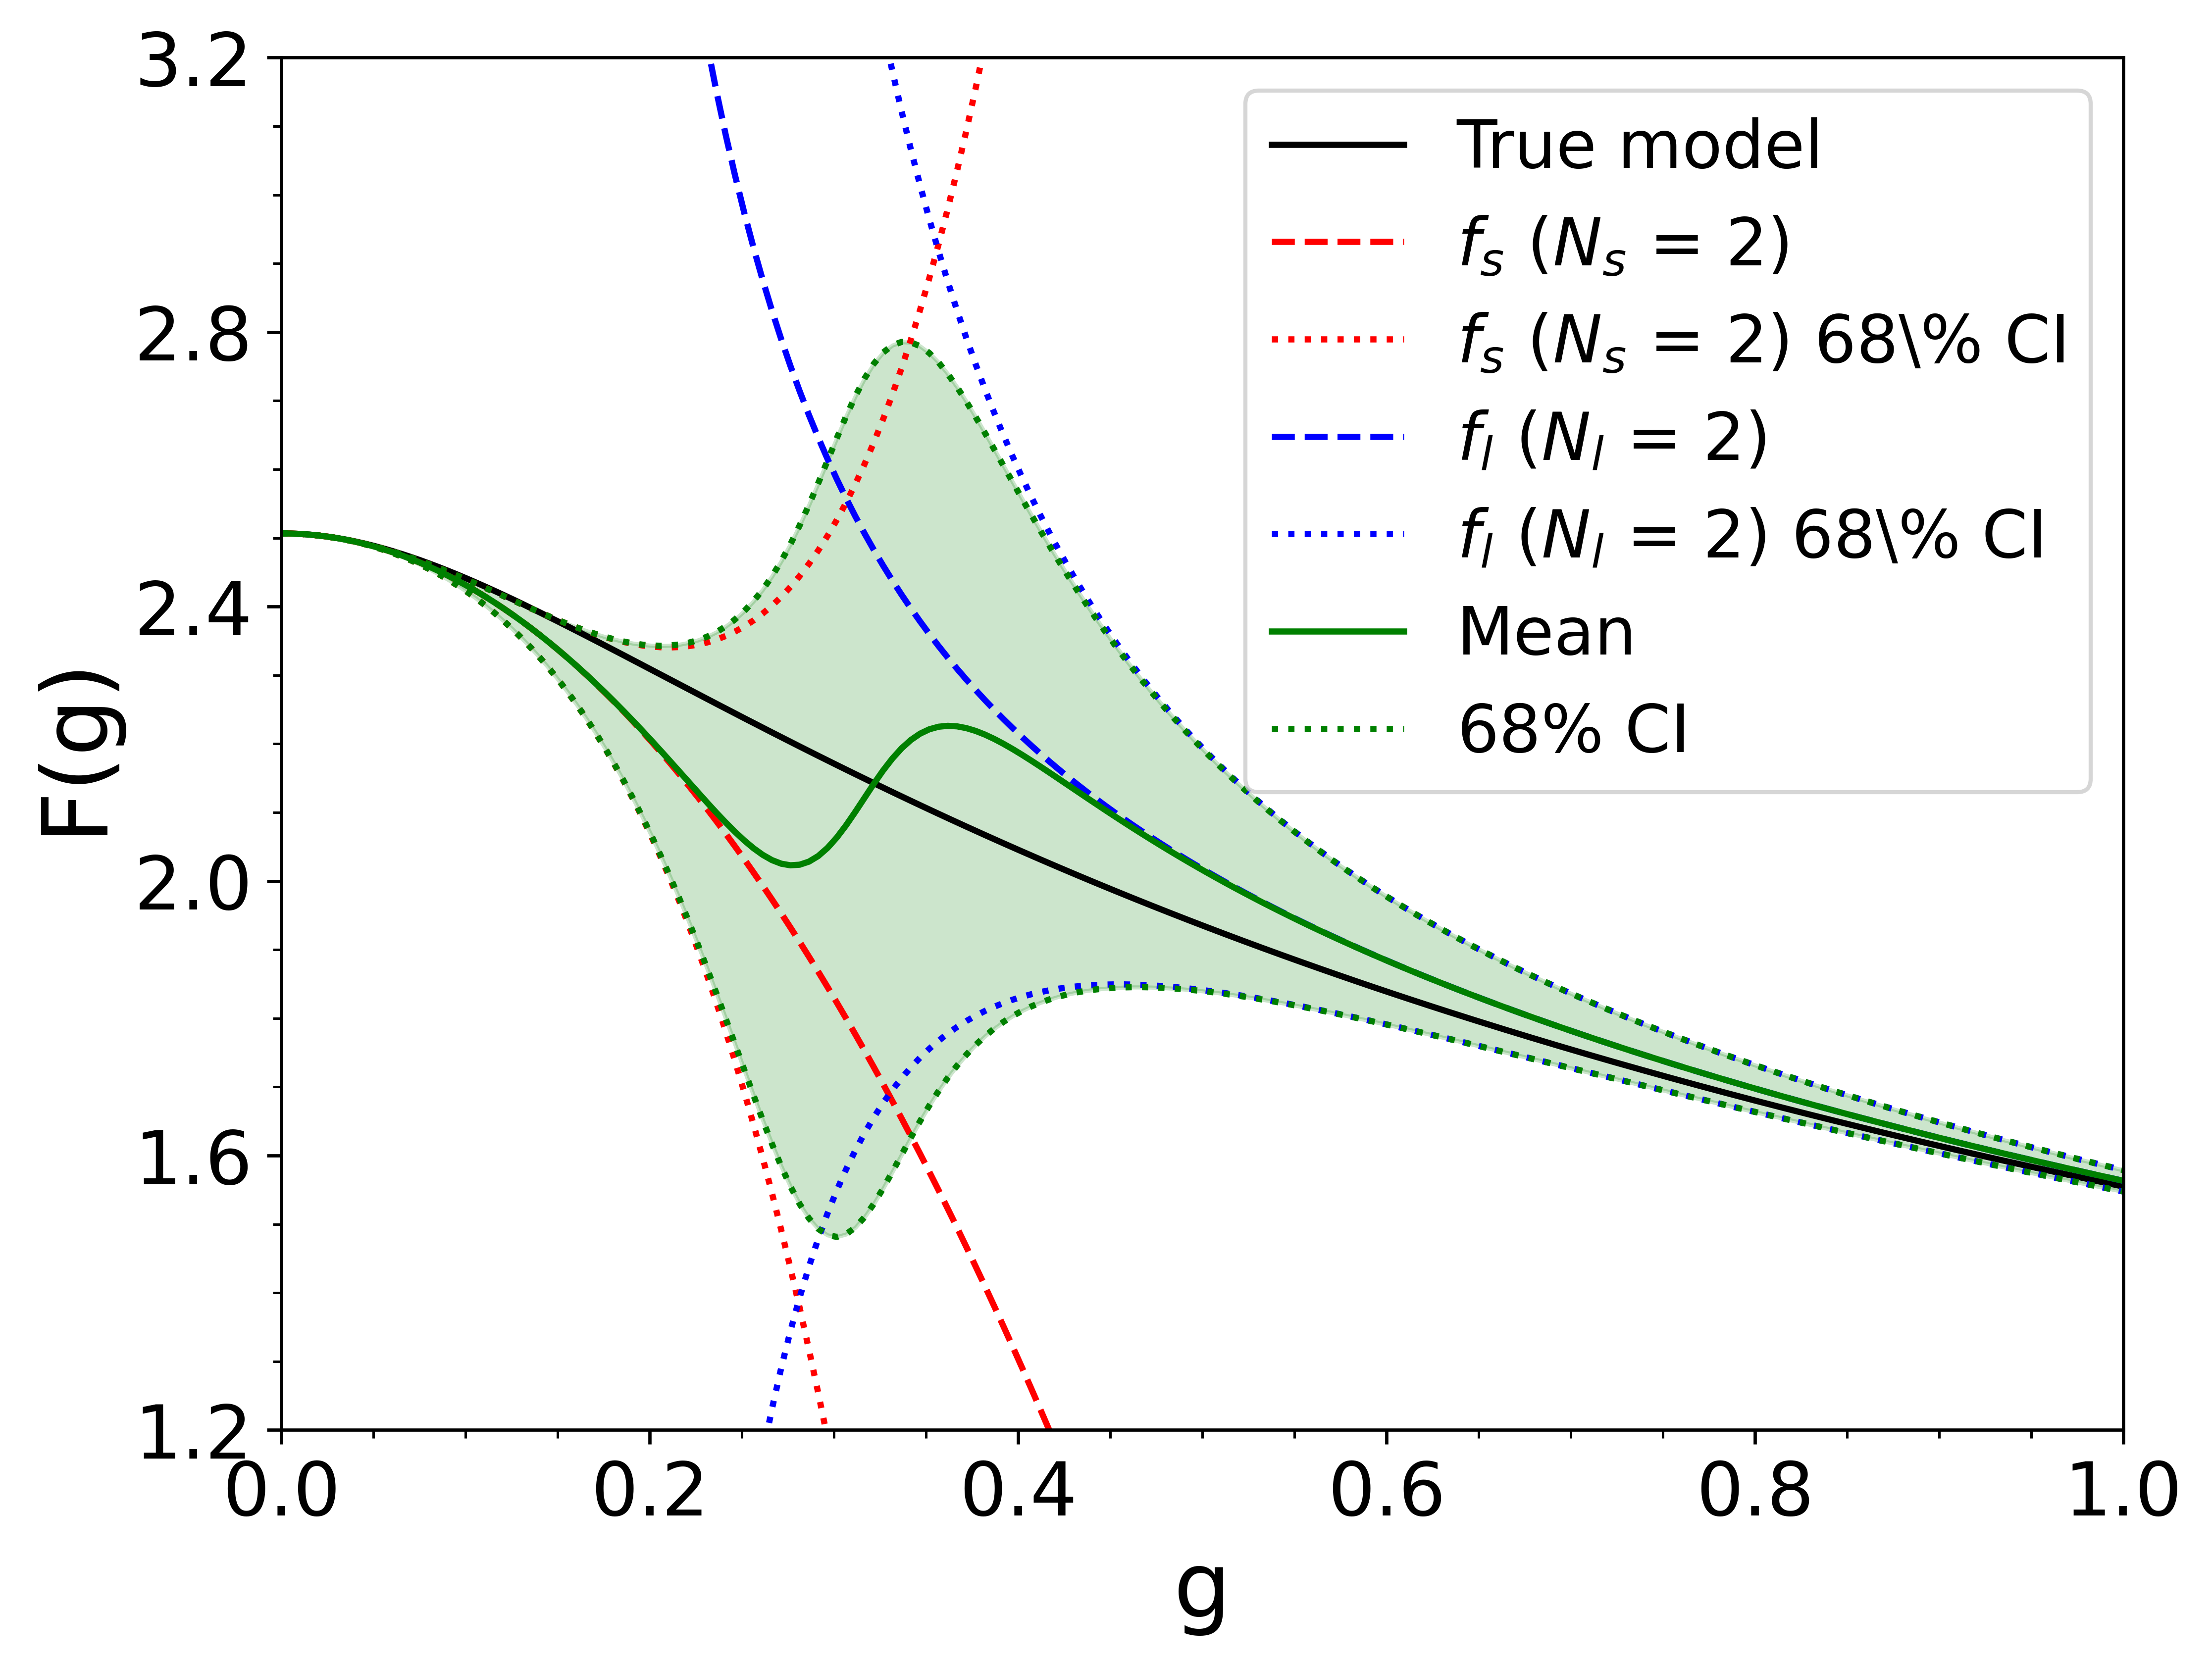

In [14]:
#call plot_mix() function to mix
mean1, intervals1 = model1.plot_mix(g, plot_fdagger=True)

In [15]:
#check the mean and variance for N_s = N_l = 2 with the original values
if ns == nl == 2:
    mean_check = np.array([2.50662827, 2.50643831, 2.50586856, 2.50491903, 2.50358972,
        2.50188062, 2.49979175, 2.49732309, 2.49447465, 2.49124643,
        2.48763843, 2.48365064, 2.47928308, 2.47453573, 2.4694086 ,
        2.4639017 , 2.45801502, 2.45174857, 2.44510236, 2.43807642,
        2.43067076, 2.42288546, 2.41472057, 2.40617623, 2.39725262,
        2.38795001, 2.3782688 , 2.36820957, 2.35777312, 2.3469606 ,
        2.33577358, 2.32421423, 2.3122855 , 2.29999134, 2.28733708,
        2.27432978, 2.26097875, 2.24729626, 2.23329829, 2.21900568,
        2.20444538, 2.18965213, 2.17467054, 2.15955764, 2.14438598,
        2.12924736, 2.11425728, 2.0995599 , 2.08533359, 2.07179644,
        2.0592113 , 2.04788893, 2.03818779, 2.03050792, 2.02527619,
        2.02291984, 2.02382653, 2.02829115, 2.03645436, 2.04824287,
        2.06332654, 2.08110857, 2.10075991, 2.12129795, 2.1416953 ,
        2.16099444, 2.17840257, 2.19334916, 2.20550125, 2.21474359,
        2.22113648, 2.22486541, 2.22619265, 2.22541717, 2.22284479,
        2.21876832, 2.21345579, 2.20714485, 2.20004125, 2.19232   ,
        2.1841278 , 2.17558633, 2.16679557, 2.15783699, 2.14877658,
        2.13966736, 2.13055169, 2.12146316, 2.11242816, 2.10346724,
        2.09459618, 2.08582692, 2.07716827, 2.06862652, 2.06020597,
        2.05190928, 2.04373783, 2.03569196, 2.02777122, 2.01997453,
        2.0123003 , 2.00474659, 1.99731117, 1.98999159, 1.98278528,
        1.97568957, 1.96870172, 1.96181898, 1.95503859, 1.94835782,
        1.94177397, 1.93528439, 1.92888648, 1.9225777 , 1.9163556 ,
        1.91021777, 1.90416189, 1.89818571, 1.89228705, 1.88646381,
        1.88071395, 1.87503552, 1.86942662, 1.86388544, 1.8584102 ,
        1.85299922, 1.84765086, 1.84236355, 1.83713578, 1.83196608,
        1.82685304, 1.82179531, 1.81679158, 1.81184059, 1.80694111,
        1.80209199, 1.79729208, 1.79254029, 1.78783557, 1.78317691,
        1.77856331, 1.77399384, 1.76946756, 1.7649836 , 1.7605411 ,
        1.75613922, 1.75177717, 1.74745417, 1.74316946, 1.73892232,
        1.73471204, 1.73053794, 1.72639935, 1.72229564, 1.71822617,
        1.71419035, 1.71018758, 1.70621731, 1.70227896, 1.69837201,
        1.69449593, 1.69065022, 1.68683438, 1.68304792, 1.67929039,
        1.67556132, 1.67186027, 1.66818682, 1.66454054, 1.66092102,
        1.65732786, 1.65376068, 1.65021909, 1.64670272, 1.64321121,
        1.63974422, 1.63630139, 1.63288239, 1.6294869 , 1.62611458,
        1.62276514, 1.61943825, 1.61613363, 1.61285098, 1.60959002,
        1.60635046, 1.60313203, 1.59993446, 1.5967575 , 1.59360088,
        1.59046435, 1.58734767, 1.58425059, 1.58117288, 1.57811431,
        1.57507465, 1.57205367, 1.56905117, 1.56606692, 1.56310071])
    var_check = np.array([[2.50662827, 2.50662827],
        [2.50643825, 2.50643836],
        [2.50586769, 2.50586943],
        [2.50491463, 2.50492343],
        [2.50357583, 2.50360361],
        [2.50184671, 2.50191454],
        [2.49972143, 2.49986207],
        [2.49719282, 2.49745336],
        [2.49425242, 2.49469688],
        [2.49089046, 2.4916024 ],
        [2.48709588, 2.48818097],
        [2.48285631, 2.48444498],
        [2.47815807, 2.48040809],
        [2.47298619, 2.47608527],
        [2.46732441, 2.4714928 ],
        [2.46115513, 2.46664827],
        [2.45445949, 2.46157054],
        [2.44721732, 2.45627982],
        [2.43940713, 2.45079759],
        [2.43100617, 2.44514667],
        [2.42199037, 2.43935116],
        [2.4123344 , 2.43343651],
        [2.40201165, 2.42742949],
        [2.39099425, 2.42135821],
        [2.37925308, 2.41525216],
        [2.36675782, 2.4091422 ],
        [2.35347698, 2.40306063],
        [2.33937793, 2.39704121],
        [2.32442699, 2.39111926],
        [2.30858951, 2.3853317 ],
        [2.29182998, 2.37971718],
        [2.27411223, 2.37431624],
        [2.25539957, 2.36917142],
        [2.23565511, 2.36432758],
        [2.21484208, 2.35983208],
        [2.19292434, 2.35573521],
        [2.16986692, 2.35209059],
        [2.14563685, 2.34895566],
        [2.12020419, 2.3463924 ],
        [2.09354332, 2.34446805],
        [2.06563473, 2.34325603],
        [2.03646723, 2.34283702],
        [2.00604089, 2.34330019],
        [1.97437074, 2.34474454],
        [1.94149154, 2.34728041],
        [1.90746376, 2.35103096],
        [1.87238106, 2.35613349],
        [1.83637937, 2.36274043],
        [1.79964771, 2.37101947],
        [1.76244058, 2.3811523 ],
        [1.72509147, 2.39333113],
        [1.68802624, 2.40775163],
        [1.65177453, 2.42460104],
        [1.61697608, 2.44403976],
        [1.58437755, 2.46617483],
        [1.55481471, 2.49102497],
        [1.52917477, 2.51847829],
        [1.50833527, 2.54824703],
        [1.49308084, 2.57982789],
        [1.48400579, 2.61247995],
        [1.48141897, 2.64523411],
        [1.48527312, 2.67694401],
        [1.49514019, 2.70637962],
        [1.51024509, 2.73235081],
        [1.52955395, 2.75383666],
        [1.55189735, 2.77009153],
        [1.57609977, 2.78070538],
        [1.60108853, 2.78560979],
        [1.62596591, 2.7850366 ],
        [1.65004101, 2.77944617],
        [1.6728279 , 2.76944507],
        [1.69402175, 2.75570906],
        [1.71346423, 2.73892106],
        [1.73110693, 2.7197274 ],
        [1.74697836, 2.69871123],
        [1.7611568 , 2.67637985],
        [1.77374959, 2.65316199],
        [1.78487826, 2.62941143],
        [1.79466834, 2.60541417],
        [1.80324285, 2.58139714],
        [1.81071841, 2.55753719],
        [1.81720314, 2.53396953],
        [1.82279579, 2.51079534],
        [1.82758564, 2.48808834],
        [1.83165285, 2.46590031],
        [1.83506906, 2.44426566],
        [1.83789814, 2.42320524],
        [1.84019698, 2.40272934],
        [1.84201618, 2.38284014],
        [1.8434008 , 2.36353368],
        [1.84439101, 2.34480135],
        [1.84502266, 2.32663118],
        [1.84532777, 2.30900876],
        [1.84533507, 2.29191798],
        [1.8450703 , 2.27534165],
        [1.84455664, 2.25926193],
        [1.84381498, 2.24366067],
        [1.84286419, 2.22851972],
        [1.84172137, 2.21382107],
        [1.84040202, 2.19954703],
        [1.83892024, 2.18568036],
        [1.83728889, 2.17220429],
        [1.8355197 , 2.15910263],
        [1.83362341, 2.14635977],
        [1.83160985, 2.13396072],
        [1.82948805, 2.12189108],
        [1.82726634, 2.1101371 ],
        [1.82495235, 2.0986856 ],
        [1.82255315, 2.08752403],
        [1.82007526, 2.07664038],
        [1.81752472, 2.06602322],
        [1.81490711, 2.05566167],
        [1.81222762, 2.04554534],
        [1.80949105, 2.03566435],
        [1.80670189, 2.02600931],
        [1.80386429, 2.01657125],
        [1.80098212, 2.00734165],
        [1.79805901, 1.99831241],
        [1.79509831, 1.98947579],
        [1.79210318, 1.98082444],
        [1.78907655, 1.97235136],
        [1.78602117, 1.96404988],
        [1.7829396 , 1.95591364],
        [1.77983426, 1.94793661],
        [1.7767074 , 1.94011299],
        [1.77356113, 1.93243731],
        [1.77039742, 1.9249043 ],
        [1.76721814, 1.91750897],
        [1.76402501, 1.91024655],
        [1.76081969, 1.90311247],
        [1.7576037 , 1.89610239],
        [1.75437848, 1.88921215],
        [1.75114538, 1.88243778],
        [1.74790569, 1.87577548],
        [1.74466059, 1.86922164],
        [1.7414112 , 1.86277277],
        [1.73815859, 1.85642556],
        [1.73490375, 1.85017683],
        [1.73164761, 1.84402354],
        [1.72839105, 1.83796277],
        [1.72513489, 1.83199174],
        [1.72187992, 1.82610776],
        [1.71862686, 1.82030827],
        [1.71537639, 1.81459081],
        [1.71212918, 1.80895302],
        [1.70888581, 1.80339263],
        [1.70564687, 1.79790747],
        [1.70241289, 1.79249544],
        [1.69918438, 1.78715454],
        [1.6959618 , 1.78188284],
        [1.6927456 , 1.77667848],
        [1.68953619, 1.77153968],
        [1.68633398, 1.76646471],
        [1.68313933, 1.76145194],
        [1.67995258, 1.75649976],
        [1.67677405, 1.75160665],
        [1.67360404, 1.74677113],
        [1.67044285, 1.74199177],
        [1.66729072, 1.7372672 ],
        [1.66414791, 1.73259611],
        [1.66101465, 1.72797721],
        [1.65789116, 1.72340928],
        [1.65477763, 1.71889113],
        [1.65167424, 1.7144216 ],
        [1.64858118, 1.70999959],
        [1.6454986 , 1.70562404],
        [1.64242664, 1.7012939 ],
        [1.63936546, 1.69700818],
        [1.63631517, 1.69276591],
        [1.63327588, 1.68856616],
        [1.63024772, 1.68440801],
        [1.62723076, 1.68029059],
        [1.62422511, 1.67621306],
        [1.62123085, 1.67217459],
        [1.61824803, 1.66817439],
        [1.61527675, 1.66421169],
        [1.61231704, 1.66028574],
        [1.60936897, 1.65639582],
        [1.60643258, 1.65254122],
        [1.60350791, 1.64872126],
        [1.60059499, 1.64493528],
        [1.59769386, 1.64118265],
        [1.59480453, 1.63746273],
        [1.59192704, 1.63377493],
        [1.58906139, 1.63011865],
        [1.58620759, 1.62649333],
        [1.58336565, 1.62289841],
        [1.58053558, 1.61933335],
        [1.57771737, 1.61579763],
        [1.57491101, 1.61229074],
        [1.57211651, 1.60881218],
        [1.56933385, 1.60536148],
        [1.56656302, 1.60193816],
        [1.563804  , 1.59854176],
        [1.56105677, 1.59517185],
        [1.55832131, 1.59182799],
        [1.5555976 , 1.58850975],
        [1.55288561, 1.58521673],
        [1.55018531, 1.58194852],
        [1.54749668, 1.57870474]])
    
    mean_diff = np.abs(mean1 - mean_check)
    var_diff = np.abs(intervals1 - var_check)
    
    #set tolerance
    abs_tol = 1e-8

    #check all elements of the arrays
    for i in range(len(mean_diff)):

        #check mean
        if mean_diff[i] < abs_tol:
            mean_ans = 'True'
        else:
            mean_ans = 'False'

        #check intervals
        if var_diff[i,0] < abs_tol:
            var_ans_1 = 'True'
        else: 
            var_ans_1 = 'False'
        if var_diff[i, 1] < abs_tol:
            var_ans_2 = 'True'
        else: 
            var_ans_2 = 'False'
        if var_ans_1 == 'True' and var_ans_2 == 'True':
            var_ans = 'True'
        elif var_ans_1 != 'True' or var_ans_2 != 'True':
            var_ans = 'False'
        
    #print test results
    print('Mean passing?', mean_ans)
    print('Intervals passing?', var_ans)
    
else:
    pass

Mean passing? True
Intervals passing? True


And, as simple as that, there is the mixed model! The green curve is the PPD from the $f^{\dagger}$ equation at the top of this notebook. The credibility interval, in shaded green, is quite large, as was discussed at length in the paper in Section IV. 

In order to fix this (in our toy case) overly conservative band is to implement a GP in the center to take care of some of the interpolation there, where we do not have any prior information other than the variances of the series expansions (shown in dotted red and blue above). That will be the subject of the next notebook, but first let's also look at another case: $N_{s} = N_{l} = 5$. 

We begin by instantiating another object for this new choice of models. We again select 'i' for the informative error model when the question is asked.

In [16]:
#instantiate a new object for N_s = N_l = 5
ns = 5
nl = 5
model2 = Bivariate(ns, nl, error_model='informative')

Now we can simply call plot_mix() again to plot the results of mixing these two expansions.

---

*Expected values for mean2 and intervals2 below for $N_{s}=N_{l}=5$:* 

mean2 = [2.50662827 2.50643839 2.5058699  2.50492583 2.5036112...1.56617848 1.56330958 1.56045582
 1.55761707 1.55479321]

intervals2 = [[2.50662827 2.50662827]
 [2.50643839 2.50643839]
 [2.5058699  2.50586991]
 ...
 [1.56040879 1.56050285]
 [1.55757156 1.55766258]
 [1.55474917 1.55483725]]

---

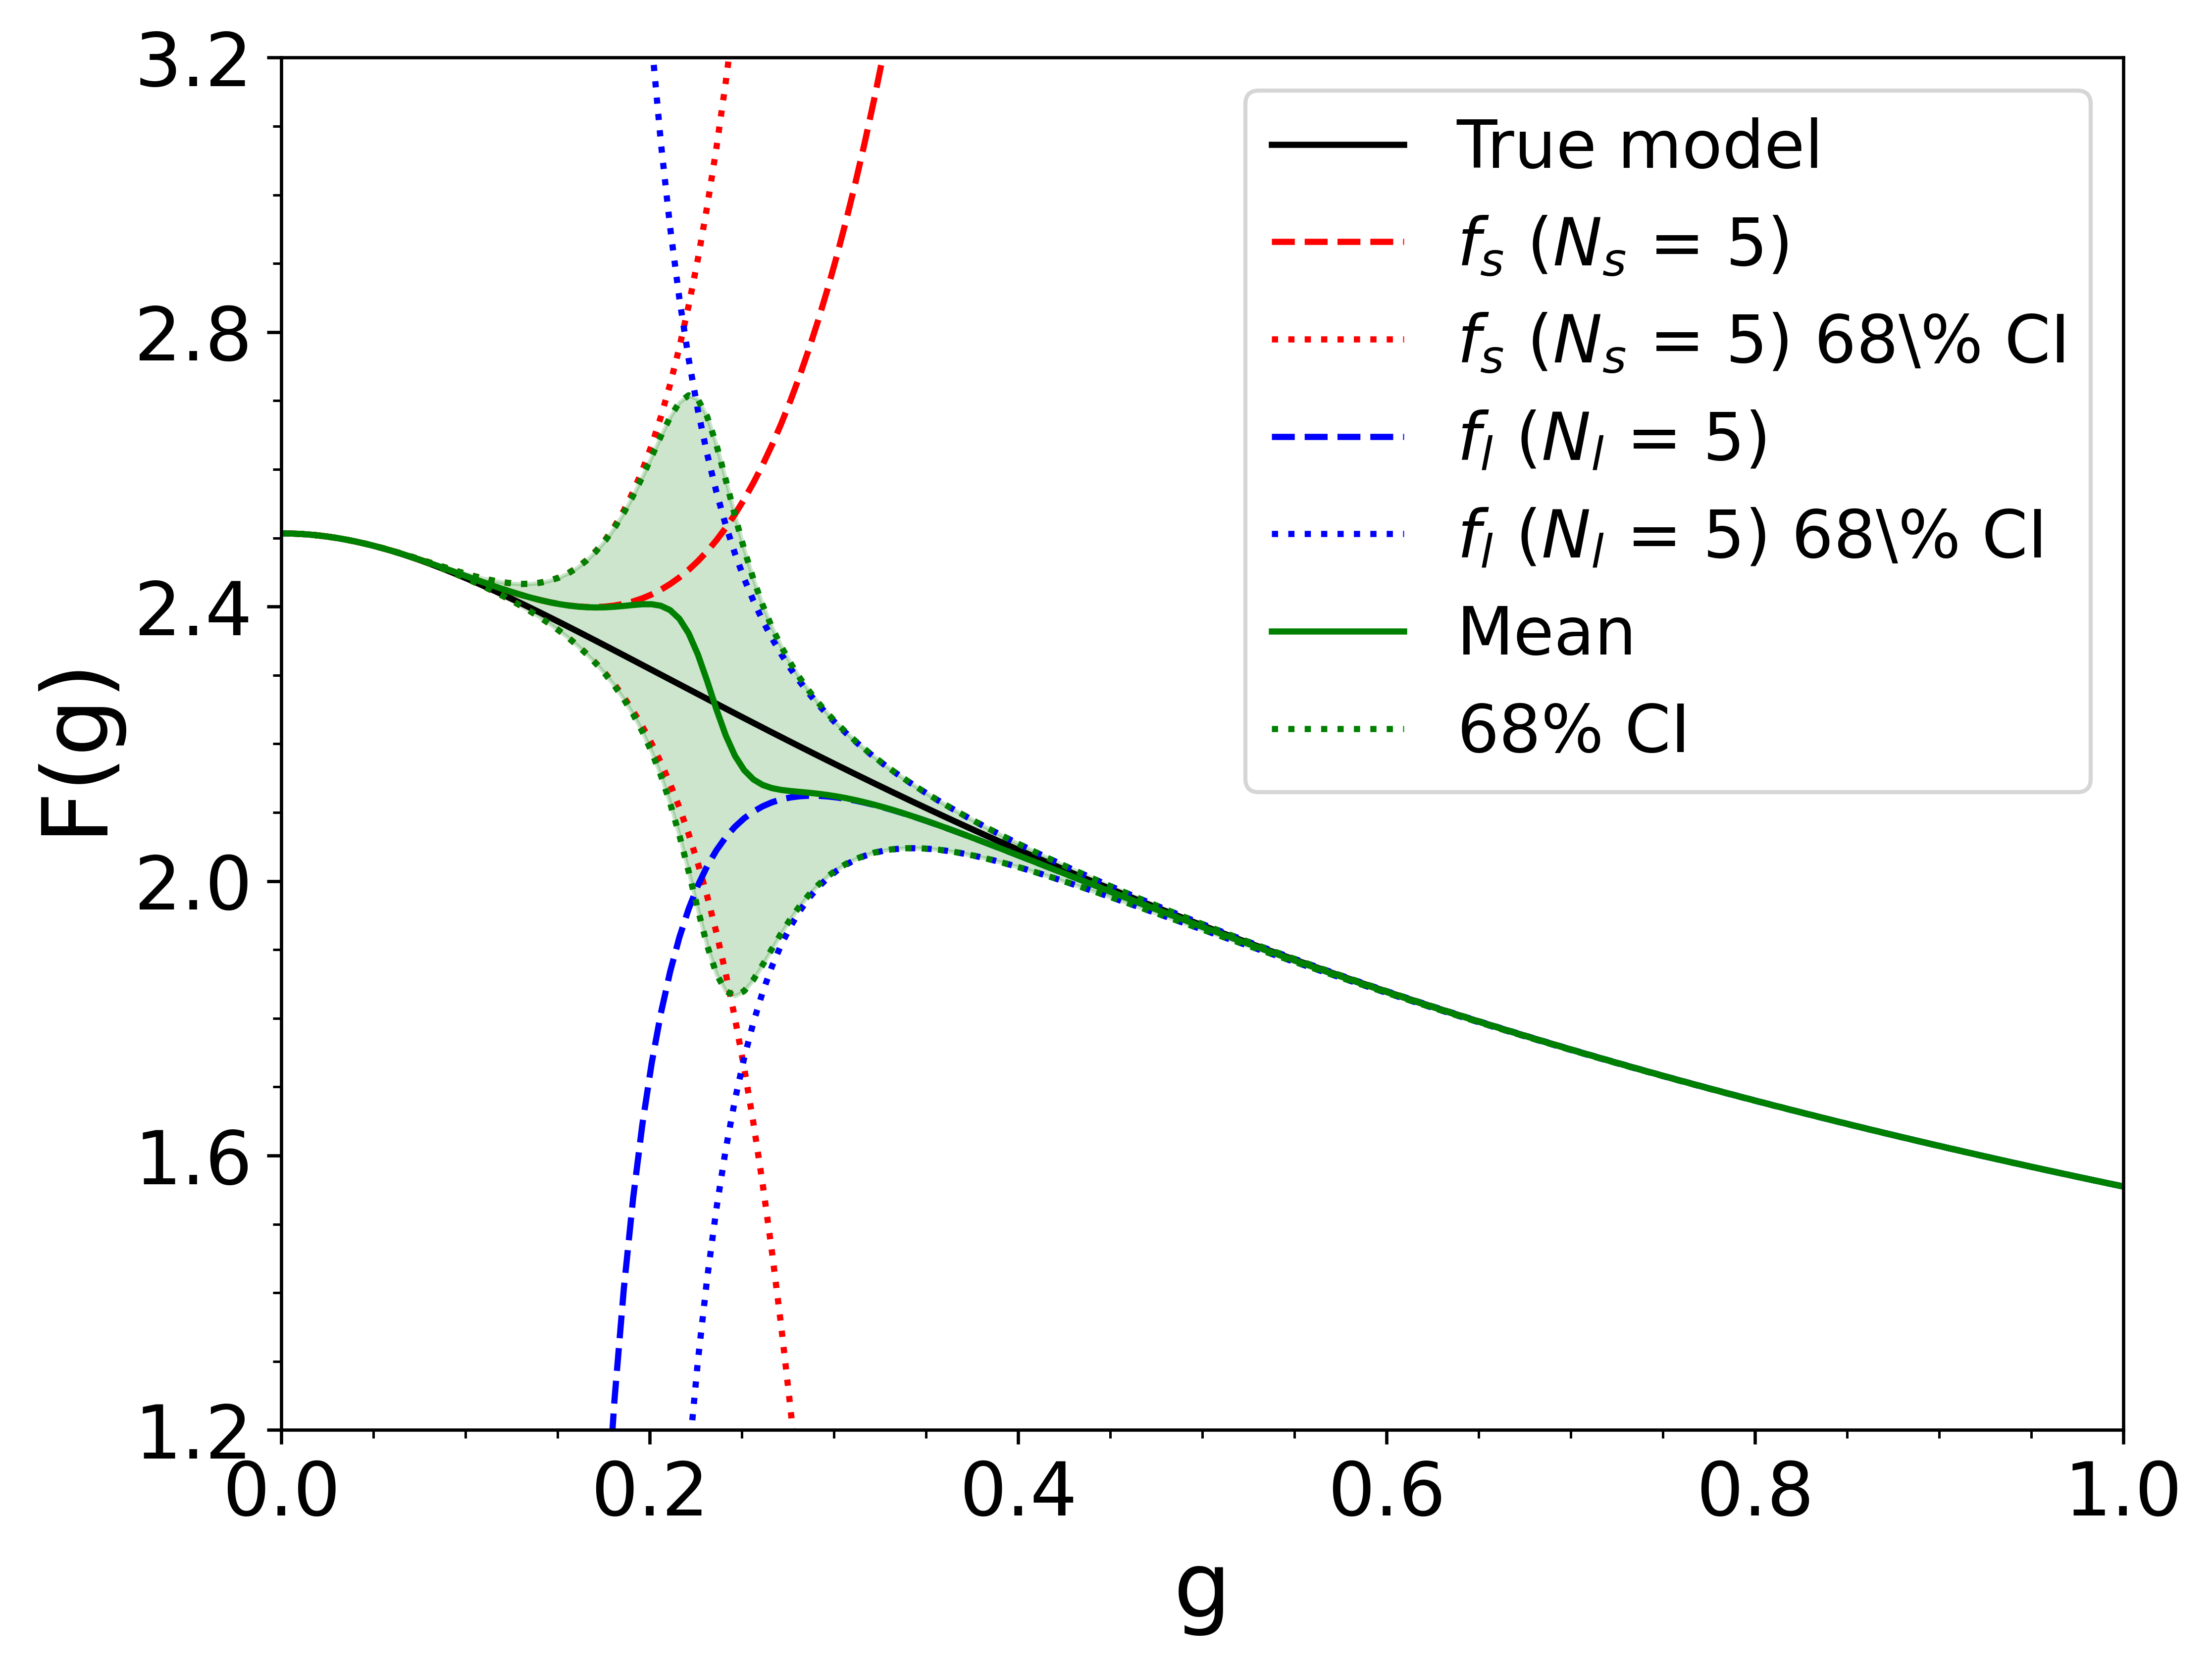

In [17]:
#call plot_mix()
mean2, intervals2 = model2.plot_mix(g, plot_fdagger=True)

This mixed model result is quite similar to the one for $N_{s} = N_{l} = 2$, but with a smaller gap, so a smaller uncertainty band overall. Let's look next at a comparison between the two theory error models developed in the paper.

---

## Error Model Comparison

In the paper, we discuss (in Section IIB) that there are multiple different ways of quantifying uncertainty on these series expansions, two of which we have coded and at our disposal now. The one we used above is dependent on which letter you typed for the error model to be chosen: u (uninformative) or i (informative). These error models have slightly different shapes when it comes to their uncertainty bands, as will be demonstrated below.

First we instantiate another object from the Bivariate method for $N_{s} = N_{l} = 3$, as this case makes the differences quite clear between the uninformative and informative error models. We type 'u' or 'i' for this first instance, as it does not matter for our comparison plot, and is only setting the error model for the rest of the object (which we will not be using anyway). 

In [18]:
#instantiate a third object for N_s = N_l = 3
ns = 3
nl = 3
model3 = Bivariate(ns, nl, error_model='informative')

We begin (and end, as everything is done in one function) by calling the __plot_error_models()__ function from the Bivariate() class, and type 'u' for the first panel, and 'i' for the second panel. 

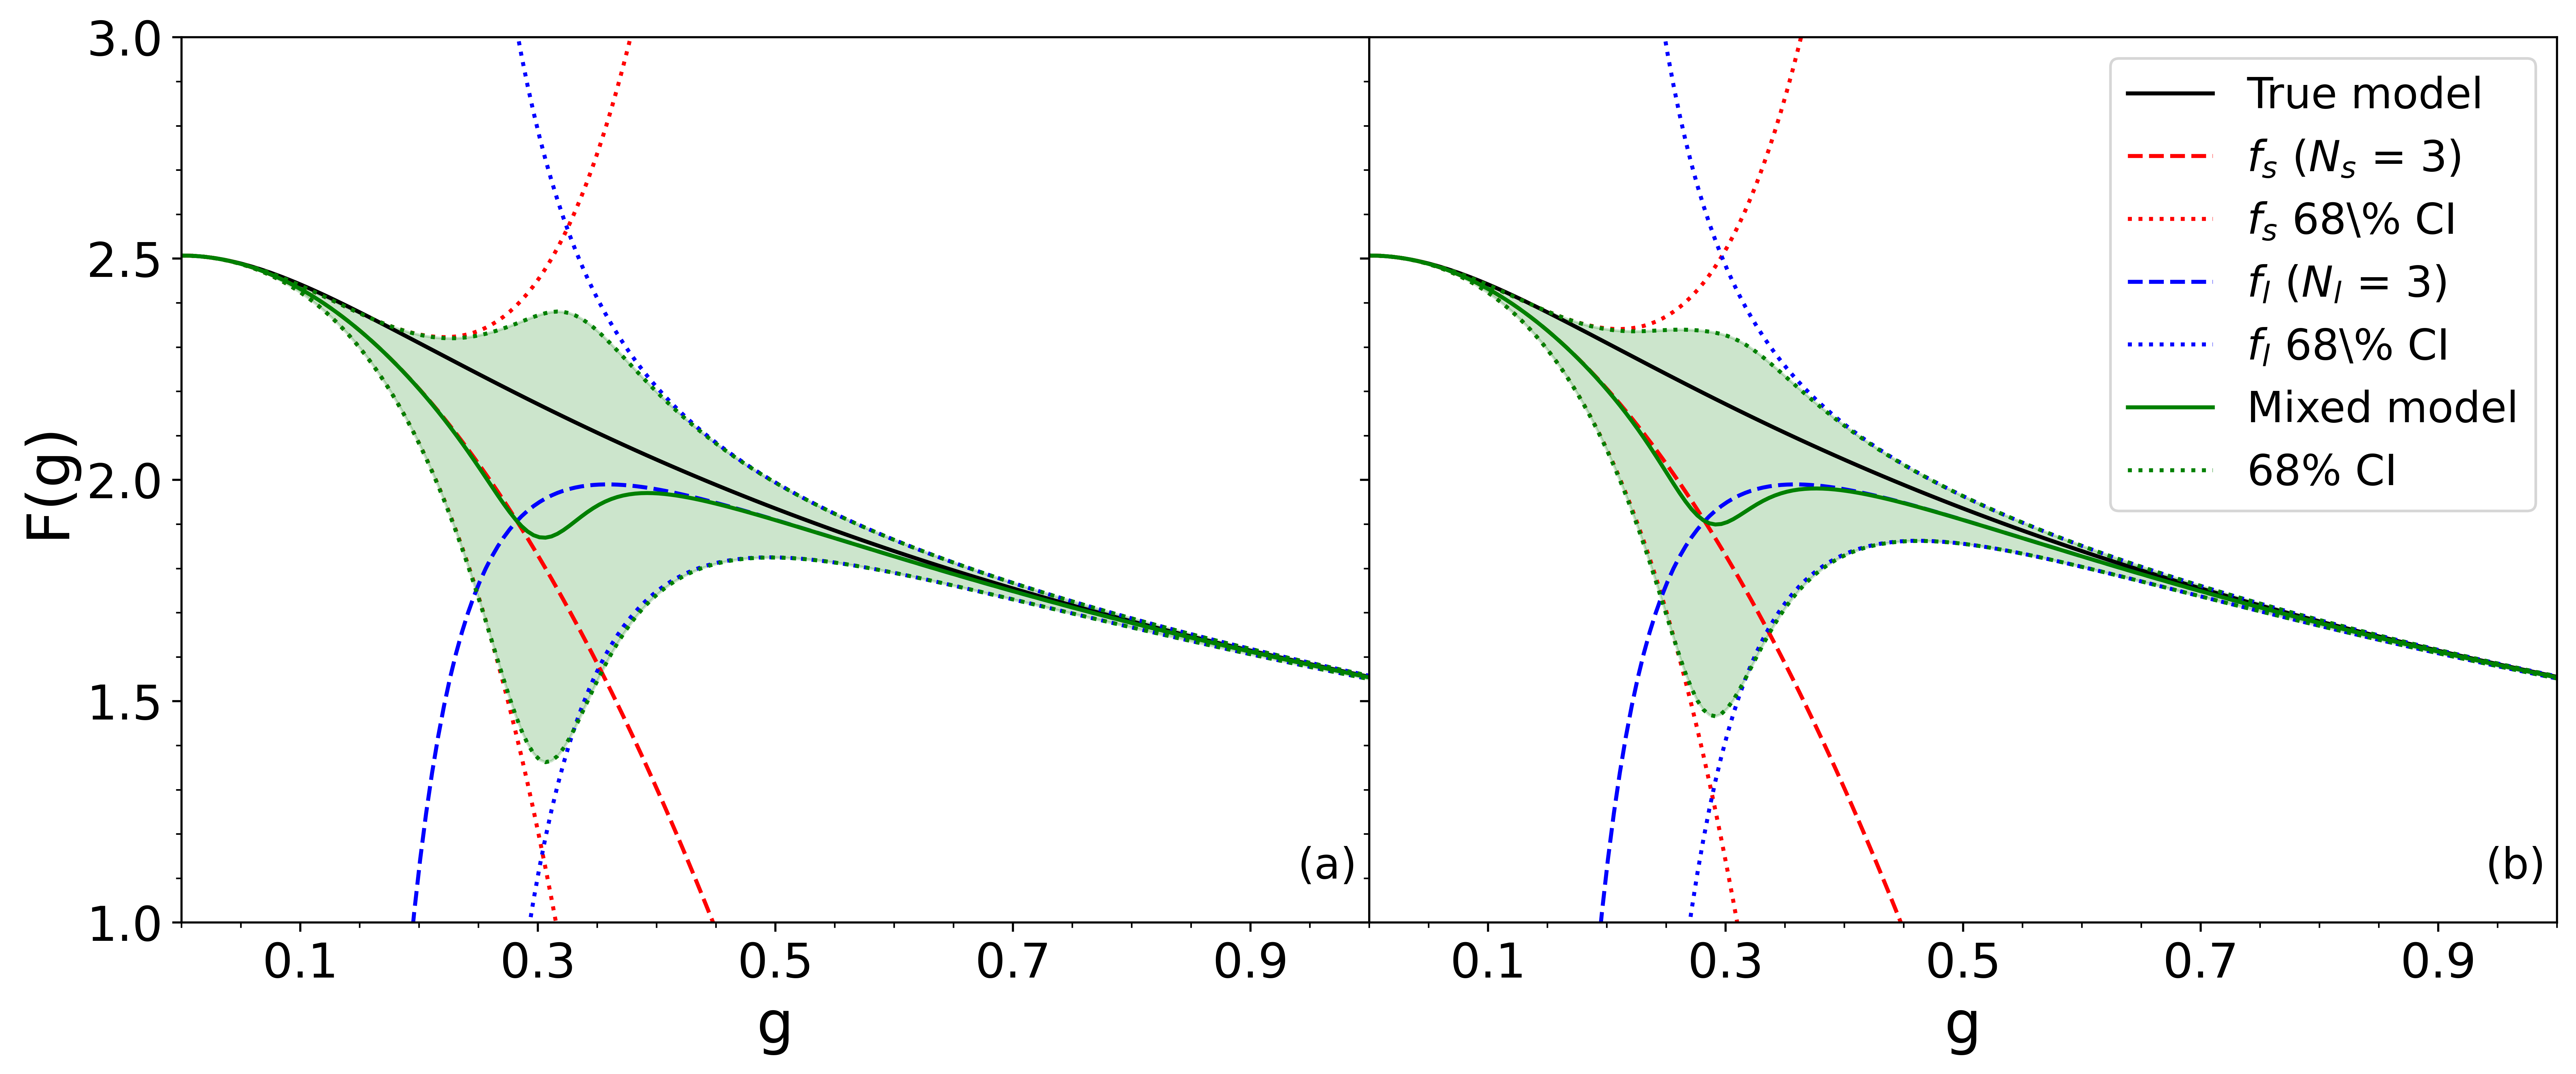

In [19]:
#plot the uninformative and informative error models
model3.plot_error_models(g)

It is not too obvious upon first glance, but it can be seen that panel (a) possesses a larger uncertainty band than panel (b) does. This is the subtle difference in the error models coming into play---panel (b) is using an error model that knows more about the next term in the series than panel (a)'s model does, so the uncertainty in the gap in panel (b) is a little smaller. However, they're both still pretty large for our toy case. Now we should try the GP and see what kind of help it provides---see the next notebook (__GP_BMM__) for details on how to include a Gaussian Process in this mixed model. 

Written by: Alexandra Semposki (06 June 2022)